In [7]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

Populating the interactive namespace from numpy and matplotlib


Загружаю данные из файла, скачанного из GA

In [8]:
data = pd.read_excel('ga_transactions.xlsx')
data.head()

,date,transactions
0,20190601,12945
1,20190602,13354
2,20190603,22882
3,20190604,23349
4,20190605,22454


Привожу дату в удобный формат

In [9]:
data.date = pd.to_datetime(data.date, format='%Y%m%d')
data.set_index('date', inplace = True)
data.head(1)

,transactions
date,
2019-06-01,12945


Смотрю на данные:

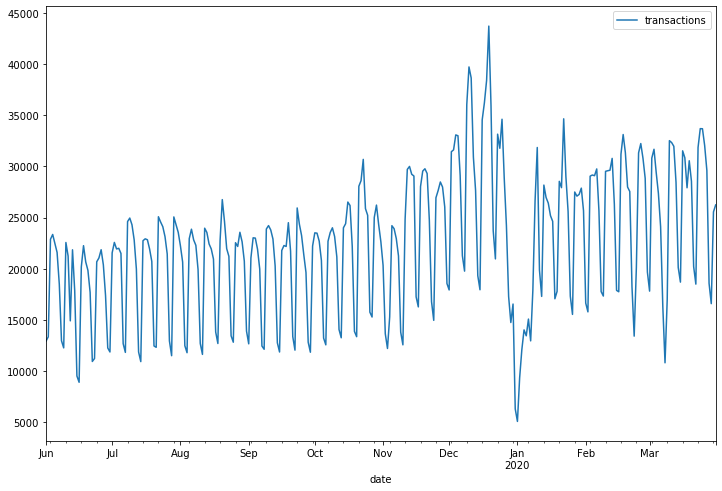

In [11]:
data.plot(figsize = (12,8))

На графике видно, что:
     - Он похож на стационарный
     - Есть недельные колебания (просадка в выходные дни)
     - Есть слабый восходящий тренд
     - Сильные отклонения декабря и января, скорее всего, объясняются праздниками
Проверю временной ряд на стационарность с помощью критерия Дики-Фуллера. В котором тестируется нулевая гипотеза о нестационарности ряда. Уровень значимости возьмем стандартный - 0.05. И посмотрю на сезонную и трендовую составляющую временного ряда:

Критерий Дики-Фуллера: p=0.047442


<Figure size 864x576 with 0 Axes>

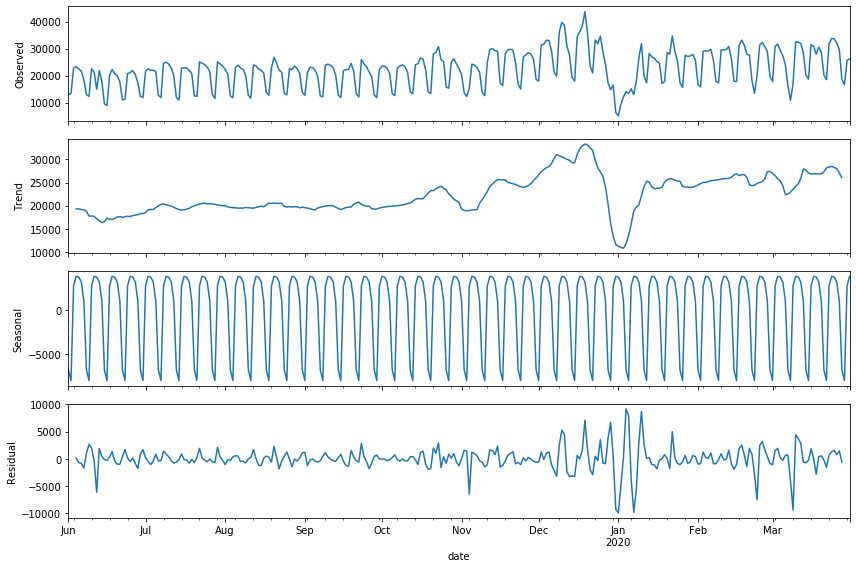

In [15]:
plt.figure(figsize(12,8))
g = sm.tsa.seasonal_decompose(data.transactions).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(data.transactions)[1])

Какие выводы можно сделать?
1. Критерий Дики-Фуллера отвергает нулевую гипотезу о нестационарности ряда
2. На графиках виден тренд, ожидание которого отлично от нуля
3. Ряд имеет ярко выраженную сезонность (недельную)
4. Остатки модели похожи на случайный шум с нулевым ожиданием - это очень хорошо.

Итак, у нас есть сезонность и тренд - от них нужно избавиться с помощью гиперпараметров.
Для тренда я воспользуюсь дифференцированием ряда. А сезонность подберу по графику корреляции